In [10]:
import pandas as pd

In [11]:
svi_df = pd.read_csv('../../data/svi.csv')
svi_df.head()

,FID,GEOID10,AREA_SQFT,AREA_ACRES,POP100_RE,HU100_RE,TotDis,TotChild,OlderAdult,Low_to_No,LEP,POC2,MedIllnes,Name,Shape__Area,Shape__Length
0,1,25025010405,3914567.54,89.8661,5522,994,470,60,331,1191,1522,1755,2131.22,Mission Hill,666100.000000,6036.192907
1,2,25025010404,1472713.92,33.8089,5817,1862,299,77,56,2387,2443,1749,2201.14,Fenway,250612.382812,2176.592171
2,3,25025010801,1376667.12,31.6039,2783,1899,84,281,390,72,462,447,1214.76,Back Bay,234357.910156,2542.043078
3,4,25025010702,3228780.12,74.1226,2400,1643,45,86,285,187,472,320,1014.20,Back Bay,549614.007812,3224.573044
4,5,25025010204,2741497.18,62.9361,3173,1283,131,13,36,895,931,1039,1181.78,Fenway,466585.238281,3143.610637


In [12]:
file_names = ['../../data/2011.csv', '../../data/2012.csv', '../../data/2013.csv', '../../data/2014.csv', '../../data/2015.csv', '../../data/2016.csv', 
              '../../data/2017.csv', '../../data/2018.csv', '../../data/2019.csv', '../../data/2020.csv', '../../data/2021.csv', '../../data/2022.csv', 
              '../../data/2023.csv']

# Read the data from the CSV files into a list of DataFrames to be combined and filter the first row of all of the files except the first one
data_list = []

for file in file_names:
    data = pd.read_csv(file,low_memory=False)
    data_list.append(data)

# Concatenate the DataFrames
df = pd.concat(data_list, ignore_index=True)
df.head()

,neighborhood,open_dt,city_council_district,precinct,subject,neighborhood_services_district,case_enquiry_id,on_time,sla_target_dt,source,...,closure_reason,location_zipcode,closed_dt,case_title,longitude,queue,geom_4326,case_status,_id,fire_district
0,Greater Mattapan,2011-06-30 21:32:33,3,1714,Public Works Department,7,101000295613,ONTIME,2011-07-14 21:32:32,Employee Generated,...,Case Closed Case Resolved replaced 100 amp fus...,NaN,2011-07-01 01:06:58,Street Light Outages,-71.077221,PWDx_Street Light Outages,0101000020E6100000CC4F6F30F1C451C0ADBC83F5C122...,Closed,1,8
1,Roslindale,2011-06-30 22:18:31,5,2008,Public Works Department,10,101000295614,ONTIME,2011-07-04 22:18:31,Self Service,...,Case Closed Case Scheduled Items have been sch...,2131.0,2011-07-01 02:12:43,Schedule a Bulk Item Pickup,-71.144741,PWDx_Schedule a Bulk Item Pickup,0101000020E6100000C960F36E43C951C06CE46A2F5524...,Closed,2,12
2,West Roxbury,2011-06-30 22:28:04,6,2017,Transportation - Traffic Division,12,101000295615,ONTIME,2011-08-14 22:28:04,Self Service,...,Case Closed Case Resolved No Sidewalk and poor...,NaN,2011-08-01 11:21:46,New Sign Crosswalk or Pavement Marking,-71.169805,BTDT_Engineering_New Sign and Pavement Marking...,0101000020E6100000B311E014DECA51C0A1102F826F26...,Closed,3,NaN
3,Hyde Park,2011-06-30 23:03:48,5,1816,Public Works Department,10,101000295616,OVERDUE,2011-07-14 23:03:48,Self Service,...,Case Closed Case Resolved completed,2136.0,2011-07-22 12:13:45,Street Light Outages,-71.115631,PWDx_Street Light_Pending_Contractor (Internal),0101000020E61000003219CE7E66C751C0DDF2D930F41F...,Closed,4,12
4,Dorchester,2011-06-30 23:12:31,3,1309,Public Works Department,7,101000295617,ONTIME,NaN,Constituent Call,...,Case Closed Case Resolved,NaN,2011-07-01 02:12:38,Highway Maintenance,-71.056878,PWDx_District 03: North Dorchester,0101000020E6100000615079E5A3C351C0C71CEA6D3F28...,Closed,5,7


In [13]:
df = df[['on_time', 'open_dt', 'closed_dt', 'case_status', 'neighborhood', 'type', 'source']]
merged_df = pd.merge(df, svi_df, left_on='neighborhood', right_on='Name', how='left')
merged_df.columns

Index(['on_time', 'open_dt', 'closed_dt', 'case_status', 'neighborhood',
       'type', 'source', 'FID', 'GEOID10', 'AREA_SQFT', 'AREA_ACRES',
       'POP100_RE', 'HU100_RE', 'TotDis', 'TotChild', 'OlderAdult',
       'Low_to_No', 'LEP', 'POC2', 'MedIllnes', 'Name', 'Shape__Area',
       'Shape__Length'],
      dtype='object')

In [14]:
# Convert dates to datetime
merged_df['open_dt'] = pd.to_datetime(merged_df['open_dt'])
merged_df['closed_dt'] = pd.to_datetime(merged_df['closed_dt'])

# Calculate time to close
merged_df['time_to_close'] = (merged_df['closed_dt'] - merged_df['open_dt']).dt.total_seconds() / 3600  # in hours

# Group by neighborhood
grouped = merged_df.groupby('neighborhood')

# Calculate averages and percentages
neighborhood_stats = grouped.agg({
    'on_time': lambda x: (x == 'ONTIME').mean(),  # average percentage of on-time cases
    'time_to_close': 'mean',  # average time to close
    'case_status': lambda x: (x == 'Closed').mean(),  # percentage of closed cases
    'FID': 'first', 'GEOID10': 'first', 'AREA_SQFT': 'first', 'AREA_ACRES': 'first',
    'POP100_RE': 'first', 'HU100_RE': 'first', 'TotDis': 'first', 'TotChild': 'first',
    'OlderAdult': 'first', 'Low_to_No': 'first', 'LEP': 'first', 'POC2': 'first', 'MedIllnes': 'first'
})

# Rename columns for clarity
neighborhood_stats.rename(columns={
    'on_time': 'avg_pct_cases_closed_on_time',
    'time_to_close': 'avg_time_to_close',
    'case_status': 'avg_pct_cases_closed'
}, inplace=True)

In [15]:
neighborhood_stats = neighborhood_stats.dropna()
neighborhood_stats.head()

,avg_pct_cases_closed_on_time,avg_time_to_close,avg_pct_cases_closed,FID,GEOID10,AREA_SQFT,AREA_ACRES,POP100_RE,HU100_RE,TotDis,TotChild,OlderAdult,Low_to_No,LEP,POC2,MedIllnes
neighborhood,,,,,,,,,,,,,,,,
Allston,0.779260,1031.228195,0.903192,8.0,2.502500e+10,1916064.65,43.9868,2791.0,1418.0,99.0,31.0,31.0,1740.0,1771.0,1083.0,1029.60
Back Bay,0.795245,849.709274,0.934282,3.0,2.502501e+10,1376667.12,31.6039,2783.0,1899.0,84.0,281.0,390.0,72.0,462.0,447.0,1214.76
Brighton,0.801888,913.472325,0.917409,9.0,2.502500e+10,3586159.72,82.3269,4985.0,2726.0,700.0,35.0,837.0,1967.0,2804.0,1123.0,2113.60
Charlestown,0.774695,922.003885,0.931955,96.0,2.502504e+10,2791324.87,64.0800,2168.0,1239.0,141.0,322.0,290.0,214.0,504.0,116.0,917.28
Dorchester,0.812933,593.002377,0.930253,25.0,2.502510e+10,5947564.59,136.5373,5154.0,2192.0,450.0,1006.0,429.0,841.0,1270.0,3052.0,1878.33


In [16]:
import matplotlib.pyplot as plt

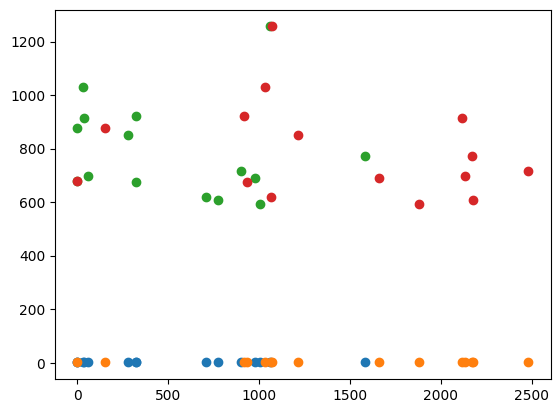

In [17]:
#plt.scatter(neighborhood_stats['Low_to_No'], neighborhood_stats['avg_pct_cases_closed_on_time'])
#plt.scatter(neighborhood_stats['TotDis'], neighborhood_stats['avg_pct_cases_closed_on_time'])
#plt.scatter(neighborhood_stats['LEP'], neighborhood_stats['avg_pct_cases_closed_on_time'])
#plt.scatter(neighborhood_stats['POC2'], neighborhood_stats['avg_pct_cases_closed_on_time'])
plt.scatter(neighborhood_stats['TotChild'], neighborhood_stats['avg_pct_cases_closed_on_time'])
plt.scatter(neighborhood_stats['MedIllnes'], neighborhood_stats['avg_pct_cases_closed_on_time'])

#plt.scatter(neighborhood_stats['Low_to_No'], neighborhood_stats['avg_time_to_close'])
#plt.scatter(neighborhood_stats['TotDis'], neighborhood_stats['avg_time_to_close'] )
#plt.scatter(neighborhood_stats['LEP'], neighborhood_stats['avg_time_to_close'])
#plt.scatter(neighborhood_stats['POC2'], neighborhood_stats['avg_time_to_close'])
plt.scatter(neighborhood_stats['TotChild'], neighborhood_stats['avg_time_to_close'])
plt.scatter(neighborhood_stats['MedIllnes'], neighborhood_stats['avg_time_to_close'])

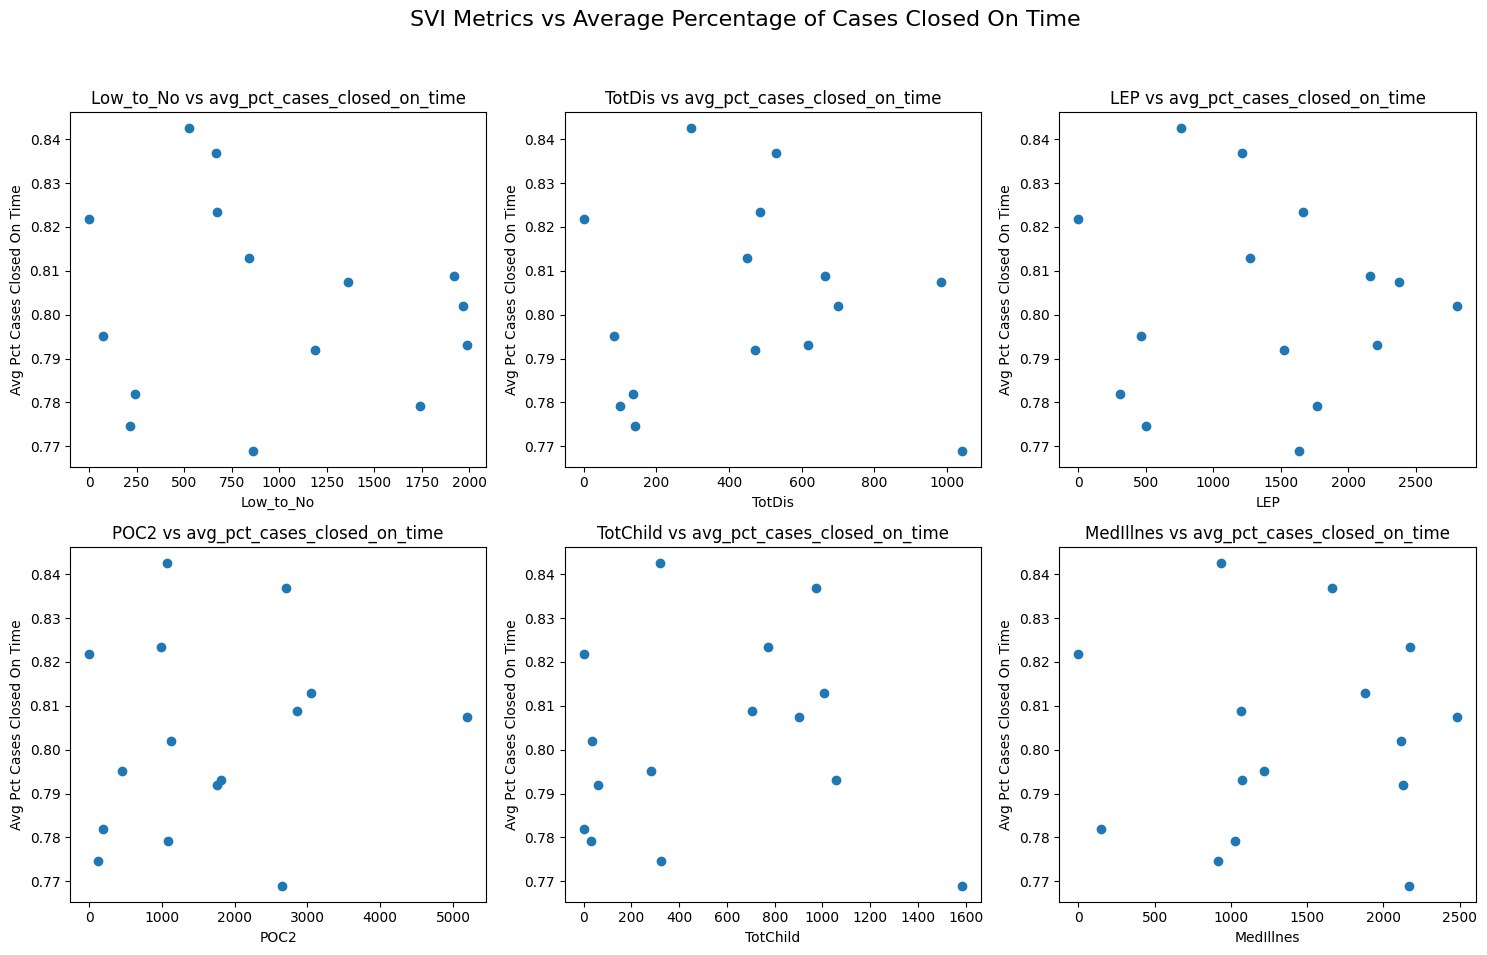

In [18]:
fig1, axs1 = plt.subplots(2, 3, figsize=(15, 10))
fig1.suptitle("SVI Metrics vs Average Percentage of Cases Closed On Time", fontsize=16)

# First row
axs1[0, 0].scatter(neighborhood_stats['Low_to_No'], neighborhood_stats['avg_pct_cases_closed_on_time'])
axs1[0, 0].set_title('Low_to_No vs avg_pct_cases_closed_on_time')
axs1[0, 0].set_xlabel('Low_to_No')
axs1[0, 0].set_ylabel('Avg Pct Cases Closed On Time')

axs1[0, 1].scatter(neighborhood_stats['TotDis'], neighborhood_stats['avg_pct_cases_closed_on_time'])
axs1[0, 1].set_title('TotDis vs avg_pct_cases_closed_on_time')
axs1[0, 1].set_xlabel('TotDis')
axs1[0, 1].set_ylabel('Avg Pct Cases Closed On Time')

axs1[0, 2].scatter(neighborhood_stats['LEP'], neighborhood_stats['avg_pct_cases_closed_on_time'])
axs1[0, 2].set_title('LEP vs avg_pct_cases_closed_on_time')
axs1[0, 2].set_xlabel('LEP')
axs1[0, 2].set_ylabel('Avg Pct Cases Closed On Time')

# Second row
axs1[1, 0].scatter(neighborhood_stats['POC2'], neighborhood_stats['avg_pct_cases_closed_on_time'])
axs1[1, 0].set_title('POC2 vs avg_pct_cases_closed_on_time')
axs1[1, 0].set_xlabel('POC2')
axs1[1, 0].set_ylabel('Avg Pct Cases Closed On Time')

axs1[1, 1].scatter(neighborhood_stats['TotChild'], neighborhood_stats['avg_pct_cases_closed_on_time'])
axs1[1, 1].set_title('TotChild vs avg_pct_cases_closed_on_time')
axs1[1, 1].set_xlabel('TotChild')
axs1[1, 1].set_ylabel('Avg Pct Cases Closed On Time')

axs1[1, 2].scatter(neighborhood_stats['MedIllnes'], neighborhood_stats['avg_pct_cases_closed_on_time'])
axs1[1, 2].set_title('MedIllnes vs avg_pct_cases_closed_on_time')
axs1[1, 2].set_xlabel('MedIllnes')
axs1[1, 2].set_ylabel('Avg Pct Cases Closed On Time')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


<function matplotlib.pyplot.tight_layout(*, pad: 'float' = 1.08, h_pad: 'float | None' = None, w_pad: 'float | None' = None, rect: 'tuple[float, float, float, float] | None' = None) -> 'None'>

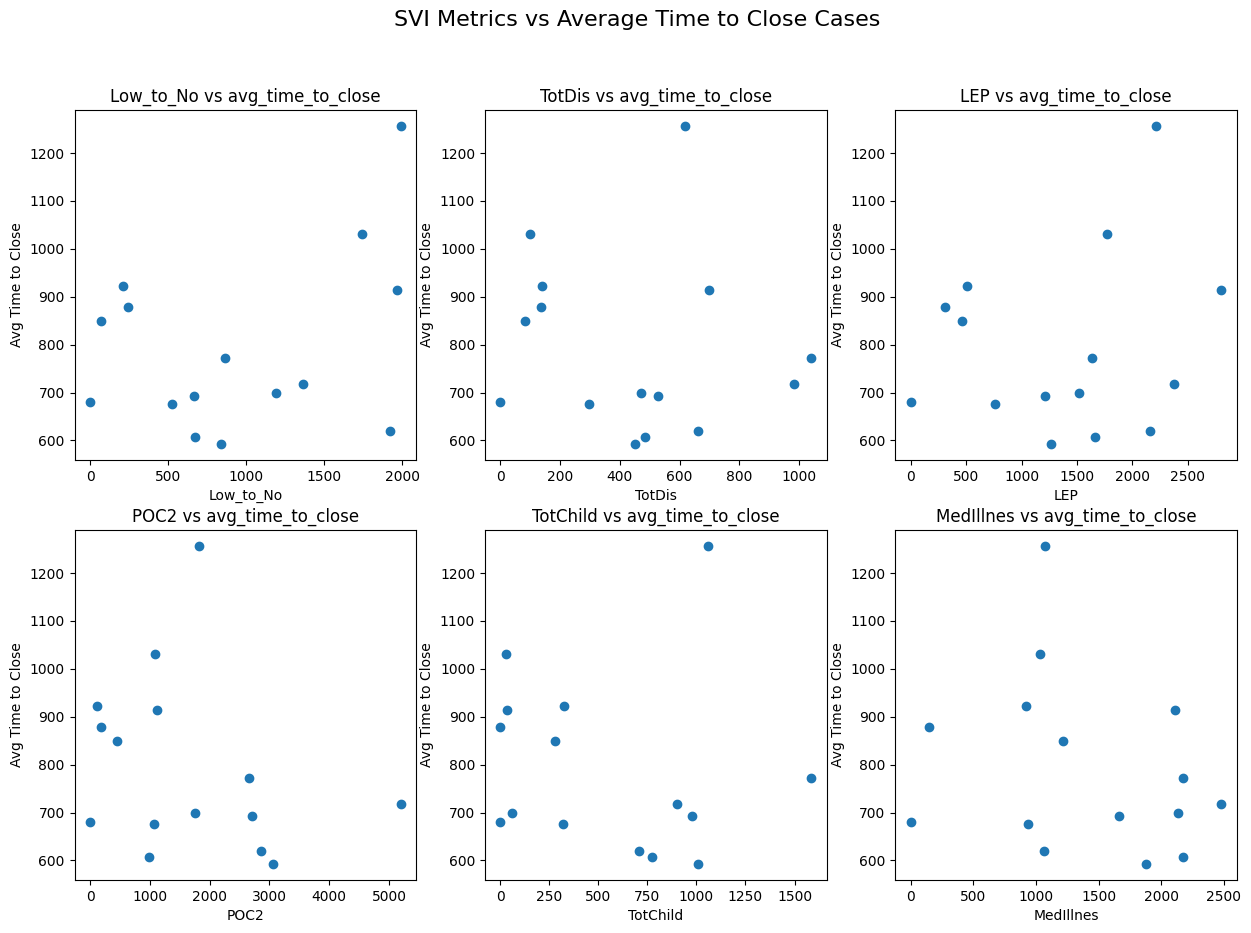

In [19]:
fig2, axs2 = plt.subplots(2, 3, figsize=(15, 10))  # Adjusting to 2 rows and 3 columns
fig2.suptitle("SVI Metrics vs Average Time to Close Cases", fontsize=16)

# First row
axs2[0, 0].scatter(neighborhood_stats['Low_to_No'], neighborhood_stats['avg_time_to_close'])
axs2[0, 0].set_title('Low_to_No vs avg_time_to_close')
axs2[0, 0].set_xlabel('Low_to_No')
axs2[0, 0].set_ylabel('Avg Time to Close')

axs2[0, 1].scatter(neighborhood_stats['TotDis'], neighborhood_stats['avg_time_to_close'])
axs2[0, 1].set_title('TotDis vs avg_time_to_close')
axs2[0, 1].set_xlabel('TotDis')
axs2[0, 1].set_ylabel('Avg Time to Close')

axs2[0, 2].scatter(neighborhood_stats['LEP'], neighborhood_stats['avg_time_to_close'])
axs2[0, 2].set_title('LEP vs avg_time_to_close')
axs2[0, 2].set_xlabel('LEP')
axs2[0, 2].set_ylabel('Avg Time to Close')

# Second row
axs2[1, 0].scatter(neighborhood_stats['POC2'], neighborhood_stats['avg_time_to_close'])
axs2[1, 0].set_title('POC2 vs avg_time_to_close')
axs2[1, 0].set_xlabel('POC2')
axs2[1, 0].set_ylabel('Avg Time to Close')

axs2[1, 1].scatter(neighborhood_stats['TotChild'], neighborhood_stats['avg_time_to_close'])
axs2[1, 1].set_title('TotChild vs avg_time_to_close')
axs2[1, 1].set_xlabel('TotChild')
axs2[1, 1].set_ylabel('Avg Time to Close')

axs2[1, 2].scatter(neighborhood_stats['MedIllnes'], neighborhood_stats['avg_time_to_close'])
axs2[1, 2].set_title('MedIllnes vs avg_time_to_close')
axs2[1, 2].set_xlabel('MedIllnes')
axs2[1, 2].set_ylabel('Avg Time to Close')

plt.tight_layout


## Dimensionality Reduction + Clustering with PCA

In [20]:
neighborhood_stats.head()

,avg_pct_cases_closed_on_time,avg_time_to_close,avg_pct_cases_closed,FID,GEOID10,AREA_SQFT,AREA_ACRES,POP100_RE,HU100_RE,TotDis,TotChild,OlderAdult,Low_to_No,LEP,POC2,MedIllnes
neighborhood,,,,,,,,,,,,,,,,
Allston,0.779260,1031.228195,0.903192,8.0,2.502500e+10,1916064.65,43.9868,2791.0,1418.0,99.0,31.0,31.0,1740.0,1771.0,1083.0,1029.60
Back Bay,0.795245,849.709274,0.934282,3.0,2.502501e+10,1376667.12,31.6039,2783.0,1899.0,84.0,281.0,390.0,72.0,462.0,447.0,1214.76
Brighton,0.801888,913.472325,0.917409,9.0,2.502500e+10,3586159.72,82.3269,4985.0,2726.0,700.0,35.0,837.0,1967.0,2804.0,1123.0,2113.60
Charlestown,0.774695,922.003885,0.931955,96.0,2.502504e+10,2791324.87,64.0800,2168.0,1239.0,141.0,322.0,290.0,214.0,504.0,116.0,917.28
Dorchester,0.812933,593.002377,0.930253,25.0,2.502510e+10,5947564.59,136.5373,5154.0,2192.0,450.0,1006.0,429.0,841.0,1270.0,3052.0,1878.33


In [27]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import plotly.express as px


# Data Preprocessing
# Standardize the data (PCA is affected by scale)
scaler = StandardScaler()
scaled_data = scaler.fit_transform(neighborhood_stats.iloc[:, :-1])  # Exclude the neighborhood name

# PCA Analysis
pca = PCA(n_components=2)
pca_result = pca.fit_transform(scaled_data)

# Add the PCA results to df
neighborhood_stats['PCA1'] = pca_result[:, 0]
neighborhood_stats['PCA2'] = pca_result[:, 1]

In [28]:
# Clustering
kmeans = KMeans(n_clusters=3)  # tune
neighborhood_stats['Cluster'] = kmeans.fit_predict(pca_result)

# Visualization with Neighborhood Labels
fig = px.scatter(neighborhood_stats, x='PCA1', y='PCA2', color='Cluster',
                 text=neighborhood_stats.index,  # This adds the neighborhood labels to each point
                 hover_data=[neighborhood_stats.index])

# Update traces
fig.update_traces(textposition='top center')

# Update layout for removing background color and gridlines
fig.update_layout(
    title='Neighborhood SVI and Performance Clusters',
    xaxis_title='PCA 1',
    yaxis_title='PCA 2',
    plot_bgcolor='rgba(173, 216, 230, 0.3)',  # Light blue background
    xaxis=dict(showgrid=False, showline=True, linewidth=2, linecolor='black', mirror=True),
    yaxis=dict(showgrid=False, showline=True, linewidth=2, linecolor='black', mirror=True),
    margin=dict(l=20, r=20, t=30, b=20)  # Optional: Adjust margins (left, right, top, bottom)
)


# Save the figure to an HTML file and open it in a web browser
fig.write_html('pca_cluster_plot.html')
print("Plot saved as 'pca_cluster_plot.html'")

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Plot saved as 'pca_cluster_plot.html'
